# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [125]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# used for displaying data and stuff
from IPython.display import display, HTML 

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [246]:
pd.options.display.float_format = '{:,.2f}'.format

# set pandas options
# show all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

### Load the Data

In [69]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [70]:
print("shape: ",df_data.shape)
print("rows: ",df_data.shape[0])
print("columns: ",df_data.shape[1])

shape:  (4324, 9)
rows:  4324
columns:  9


In [71]:
print(df_data.columns,sep="\n")

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [72]:
print("NaN:",df_data.isnull().values.any())
print("duplicated:",df_data.duplicated().any())

NaN: True
duplicated: False


In [73]:
# do we can do it this way
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [74]:
try:
    df_data = df_data.drop(columns=["Unnamed: 0.1","Unnamed: 0"],axis=1)
except:
    pass

try:
    df_data["Date"] = pd.to_datetime(df_data["Date"])
except:
    pass

df_data['Price'] = df_data['Price'].str.replace(',','').astype(float)

display(df_data.head())

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Date                                        Detail  \
0  2020-08-07 05:12:00+00:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  2020-08-06 04:01:00+00:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2  2020-08-04 23:57:00+00:00            Starship Prototype | 150 Meter Hop   
3  2020-07-30 21:25:00+00:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  2020-07-30 11:50:00+00:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive  50.00        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive  65.00        Success  
4  StatusActive 145.00        Success

## Descriptive Statistics

In [75]:
df_data.describe()

Price
count   964.00
mean    153.79
std     288.45
min       5.30
25%      40.00
50%      62.00
75%     164.00
max   5,000.00

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

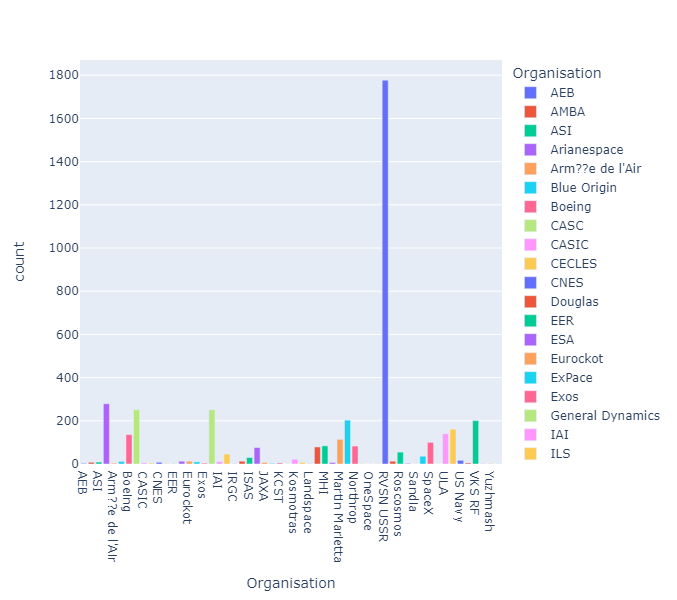

In [76]:

temp = df_data.copy()
temp["count"] = 1
temp = temp[["Organisation","count"]].groupby('Organisation').sum().reset_index()
# display(temp)
fig = px.bar(
    temp, 
    x='Organisation',
    y="count",
    color="Organisation",
    height=600
    )
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

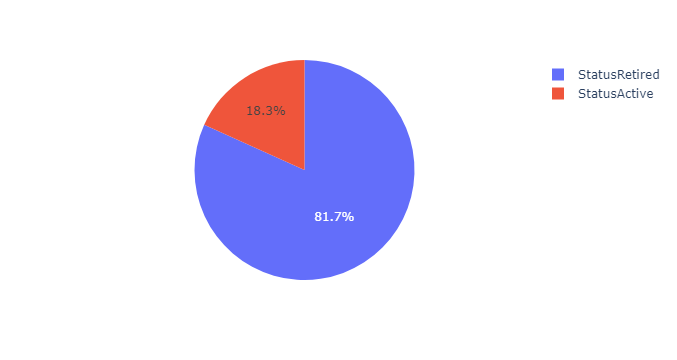

In [77]:
temp = df_data.copy()
temp["count"] = 1
temp = temp[["Rocket_Status","count"]].groupby('Rocket_Status').sum().reset_index()
# display(temp)

fig = px.pie(
    temp, 
    values='count', 
    names='Rocket_Status',
    height=300,
    )
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

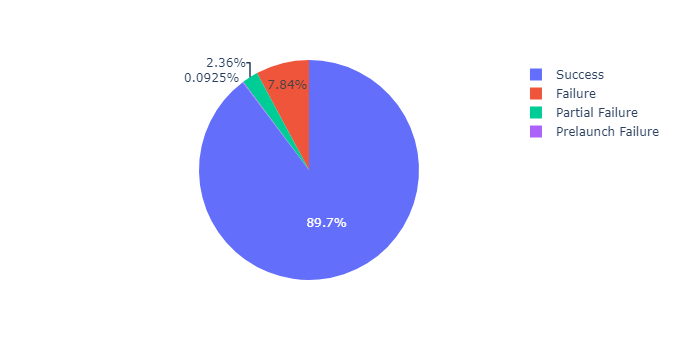

In [78]:
temp = df_data.copy()
temp["count"] = 1
temp = temp[["Mission_Status","count"]].groupby('Mission_Status').sum().reset_index()
# display(temp)

fig = px.pie(
    temp, 
    values='count', 
    names='Mission_Status',
    height=300,
    )
fig.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

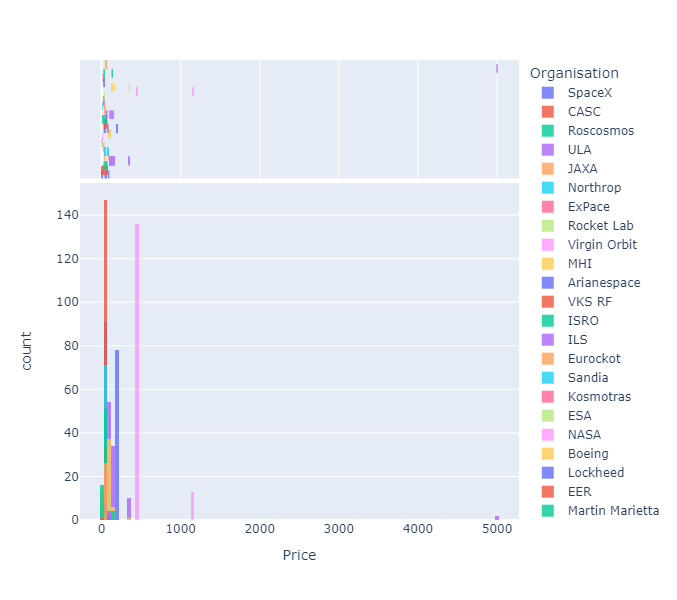

In [93]:
temp = df_data.copy().dropna()

fig = px.histogram(
    temp, 
    # x='Date', 
    x = "Price",
    color='Organisation',
    marginal="rug",
    hover_data=df_data.columns,
    height=600
    )
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.80)
fig.show()

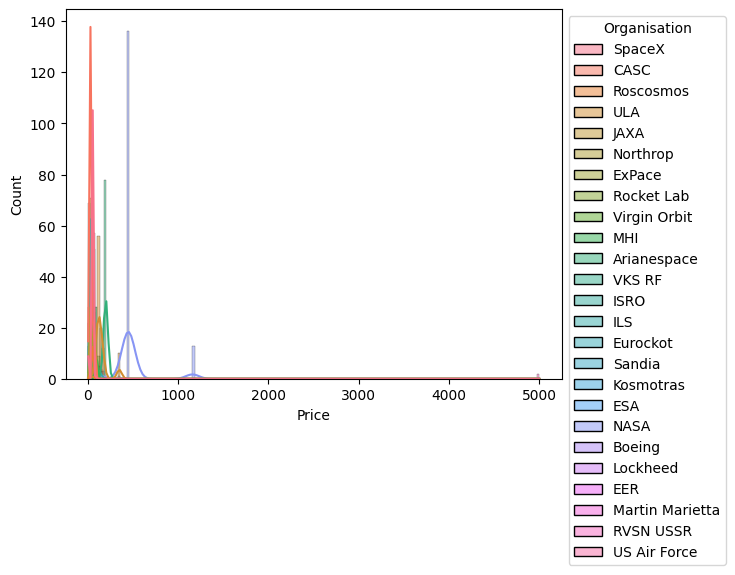

In [80]:
temp = df_data.copy().dropna()
ax = sns.histplot(
    temp,
    x = "Price",
    hue = "Organisation",
    kde=True,
    legend= True
    )
sns.move_legend(ax,"upper left",bbox_to_anchor=(1,1))

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [127]:
def get_country(x):
    return x.split(",")[-1].strip()

def get_A3(x):
    try:
        # print(x)
        if x == "Russia":
            x = "Russian Federation"
        if x == "Shahrud Missile Test Site":
            x = "IRN"
        if x == "Iran":
            x = "IRN"
        if x == "New Mexico":
            x = "USA"
        if x == "Pacific Missile Range Facility":
            x = "USA"
        if x == "Barents Sea":
            x = "Russian Federation"
        if x == "Gran Canaria":
            x = "USA"
        if x == "Yellow Sea":
            x = "China"
        if x == "North Korea":
            x = "PRK"
        if x == "South Korea":
            x = "KOR"
        if x == "Pacific Ocean":
            x = "USA"
        a3 = countries.get(x).alpha3
        return a3
    except:
        print(x)

# df_data["A3"] = 
df_data["Country"] = df_data["Location"].apply(get_country)
df_data["A3"] = df_data["Country"].apply(get_A3)
# df_data.head()

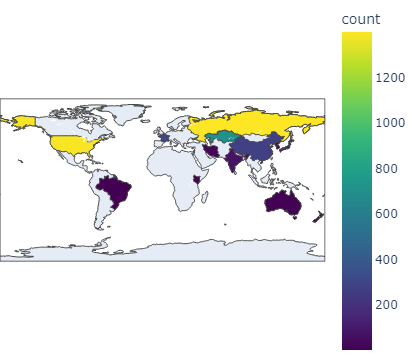

In [128]:
temp = df_data.copy()
temp["count"] = 1
temp = temp[["A3","count"]].groupby('A3').sum().reset_index()

display(HTML("<h3>Number of Launches by Country</h3>"))

fig = px.choropleth(
    temp, 
    # geojson=counties, 
    locations='A3', 
    color='count',
    color_continuous_scale="Viridis",
    # range_color=(0, 12),
    # scope="usa",
    labels={'count':'count'}
  )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [120]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Date                                        Detail  \
0  2020-08-07 05:12:00+00:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  2020-08-06 04:01:00+00:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2  2020-08-04 23:57:00+00:00            Starship Prototype | 150 Meter Hop   
3  2020-07-30 21:25:00+00:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  2020-07-30 11:50:00+00:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status     Country   A3  
0  StatusActive  50.00        Success         USA  USA  
1  StatusActive  29.75        Success       China  CHN  
2  StatusActive    NaN        Success         USA  USA  
3  StatusActive  65.00        Success  Kazakhstan  KAZ  
4  StatusActive 145.00        Success         USA  USA

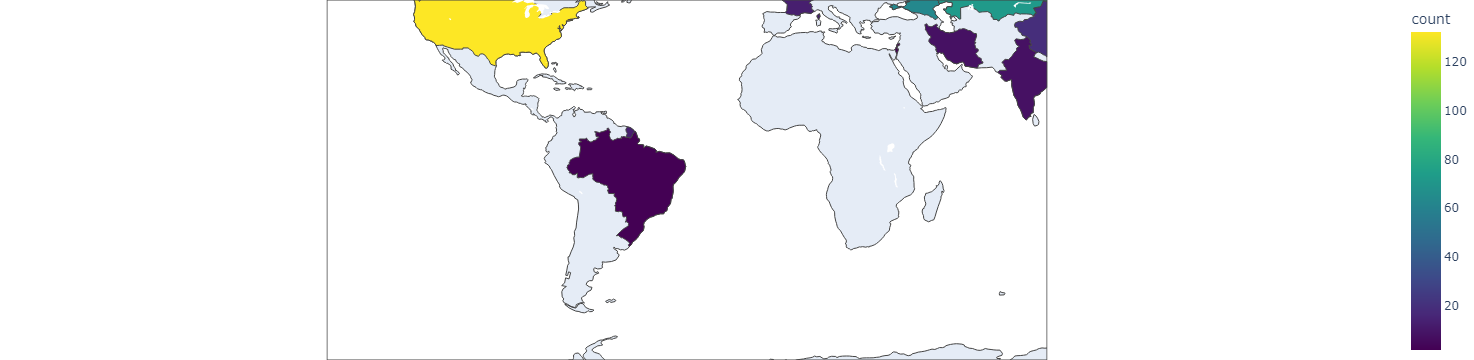

In [126]:
temp = df_data.copy()
temp = temp[temp["Mission_Status"] == "Failure"]
temp["count"] = 1
temp = temp[["A3","count"]].groupby('A3').sum().reset_index()

display(HTML("<h3>Failures by Country</h3>"))

fig = px.choropleth(
    temp, 
    # geojson=counties, 
    locations='A3', 
    color='count',
    color_continuous_scale="Viridis",
    # range_color=(0, 12),
    # scope="usa",
    labels={'count':'count'},
  )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [129]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Date                                        Detail  \
0  2020-08-07 05:12:00+00:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  2020-08-06 04:01:00+00:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2  2020-08-04 23:57:00+00:00            Starship Prototype | 150 Meter Hop   
3  2020-07-30 21:25:00+00:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  2020-07-30 11:50:00+00:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status     Country   A3  
0  StatusActive  50.00        Success         USA  USA  
1  StatusActive  29.75        Success       China  CHN  
2  StatusActive    NaN        Success         USA  USA  
3  StatusActive  65.00        Success  Kazakhstan  KAZ  
4  StatusActive 145.00        Success         USA  USA

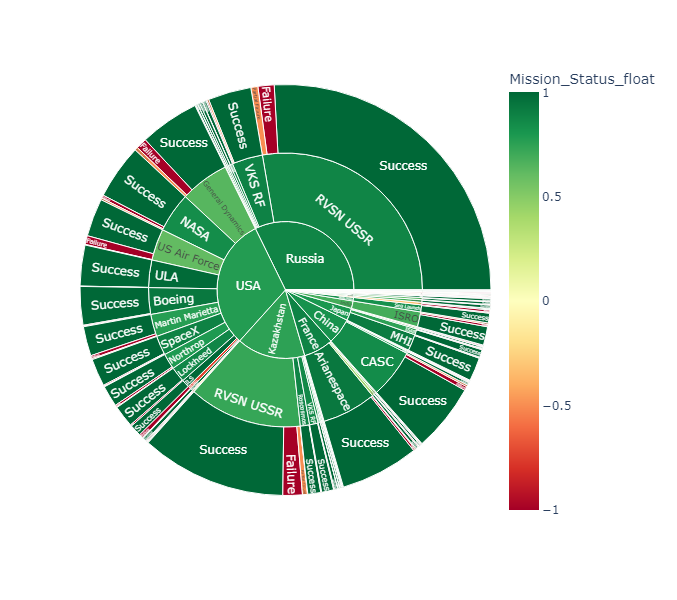

In [177]:
df_data["Mission_Status_float"] = 0.0

# print(list(df_data['Mission_Status'].drop_duplicates()))

df_data.loc[ df_data['Mission_Status'] == "Success" , 'Mission_Status_float'] = 1.0
df_data.loc[ df_data['Mission_Status']  == "Failure" , 'Mission_Status_float'] = -1.0
df_data.loc[ df_data['Mission_Status']  == "Prelaunch Failure" , 'Mission_Status_float'] = -0.25
df_data.loc[ df_data['Mission_Status']  == "Partial Failure" , 'Mission_Status_float'] = -0.5

fig = px.sunburst(
    df_data,
    path=['Country','Organisation','Mission_Status'],
    # values="Price",
    color="Mission_Status_float",
    color_continuous_scale='RdYlGn',
    height=600
)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

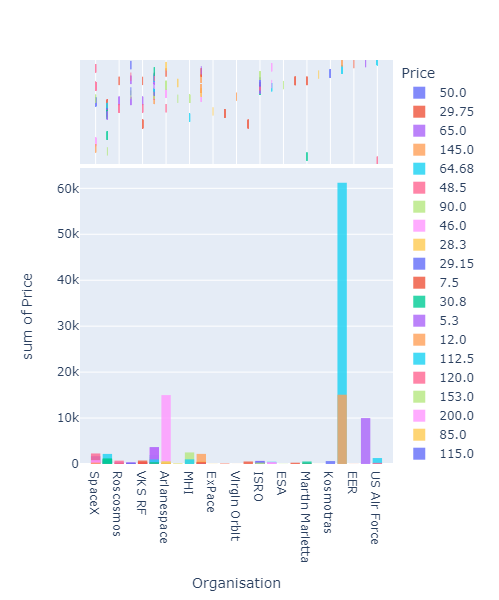

In [140]:
fig = px.histogram(
    df_data, 
    x='Organisation', 
    y = "Price",
    color='Price',
    marginal="rug",
    hover_data=df_data.columns,
    height=600
    )
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.80)
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [142]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Date                                        Detail  \
0  2020-08-07 05:12:00+00:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  2020-08-06 04:01:00+00:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2  2020-08-04 23:57:00+00:00            Starship Prototype | 150 Meter Hop   
3  2020-07-30 21:25:00+00:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  2020-07-30 11:50:00+00:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status     Country   A3  Mission_Status_float  
0  StatusActive  50.00        Success         USA  USA                  1.00  
1  StatusActive  29.75        Success       China  CHN                  1.00  
2  StatusActive    NaN        Success         USA  USA                  1.00  
3  StatusActive  65.00        Success  Kazakhstan  KAZ                  1.00  
4  StatusActive 145.00        Success         USA  USA                  1.00

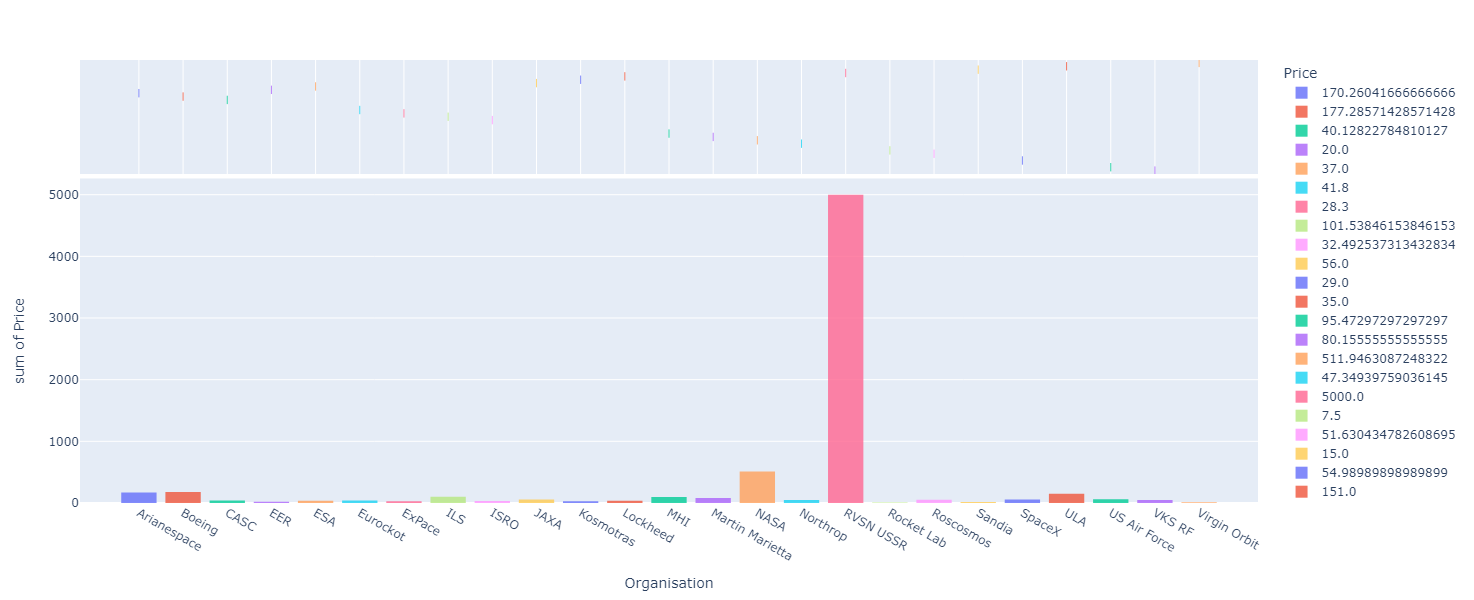

In [178]:
temp = df_data.copy().dropna()
temp = temp[["Organisation","Price"]].groupby('Organisation').mean().reset_index()

# display(temp)

display(HTML("<h3>Average Price per Launch... by Organisation</h3>"))

fig = px.histogram(
    temp, 
    x='Organisation', 
    y = "Price",
    color='Price',
    marginal="rug",
    hover_data=temp.columns,
    height=600
    )
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.80)
fig.show()

# Chart the Number of Launches per Year

In [179]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Date                                        Detail  \
0  2020-08-07 05:12:00+00:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  2020-08-06 04:01:00+00:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2  2020-08-04 23:57:00+00:00            Starship Prototype | 150 Meter Hop   
3  2020-07-30 21:25:00+00:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  2020-07-30 11:50:00+00:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status     Country   A3  Mission_Status_float  
0  StatusActive  50.00        Success         USA  USA                  1.00  
1  StatusActive  29.75        Success       China  CHN                  1.00  
2  StatusActive    NaN        Success         USA  USA                  1.00  
3  StatusActive  65.00        Success  Kazakhstan  KAZ                  1.00  
4  StatusActive 145.00        Success         USA  USA                  1.00

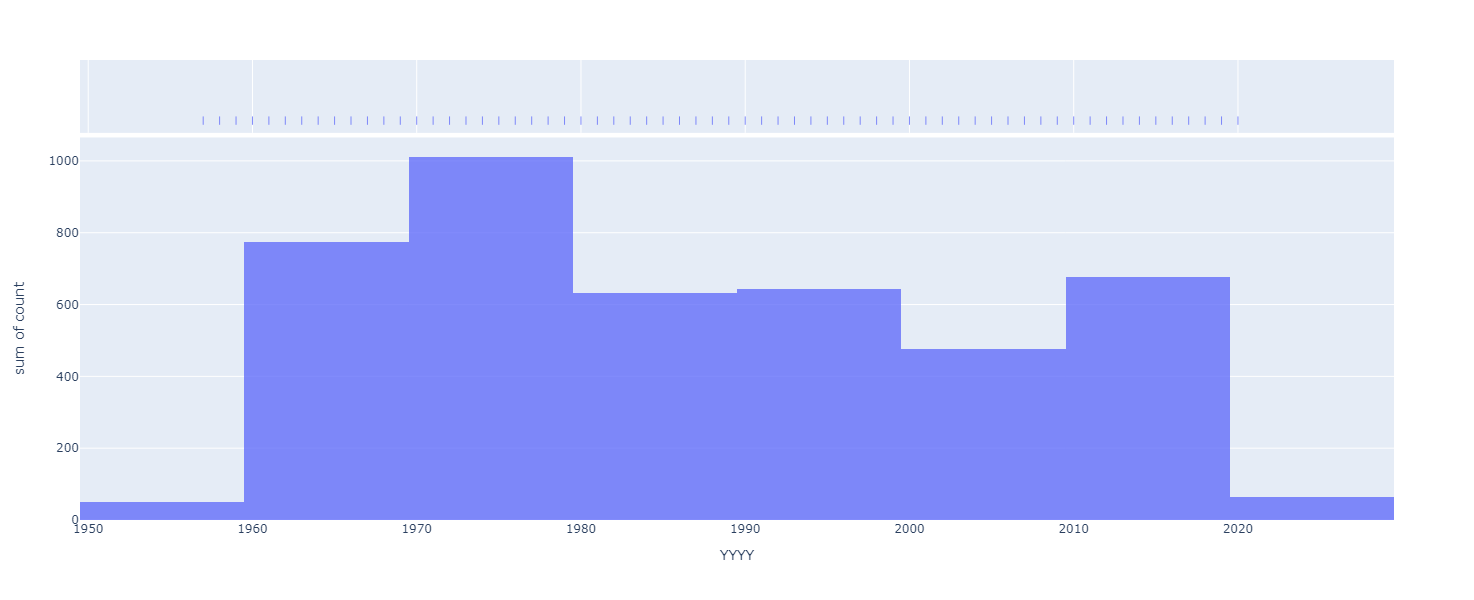

In [184]:
temp = df_data.copy()
temp['YYYY'] = pd.to_datetime(temp['Date'],utc=True).dt.strftime("%Y").astype(int)
temp['count'] = 1
temp = temp[["YYYY","count"]].groupby('YYYY').sum().reset_index()

display(HTML("<h3>Average Price per Launch... by Organisation</h3>"))

fig = px.histogram(
    temp, 
    x='YYYY', 
    y = "count",
    # color='count',
    marginal="rug",
    hover_data=temp.columns,
    height=600
    )
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.80)
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

YYYYMM  count     type
0    195710    NaN  rolling
1    195711    NaN  rolling
2    195712    NaN  rolling
3    195802    NaN  rolling
4    195803    NaN  rolling
..      ...    ...      ...
742  202004   9.17  rolling
743  202005   9.17  rolling
744  202006   9.17  rolling
745  202007   9.42  rolling
746  202008   8.67  rolling

[747 rows x 3 columns]

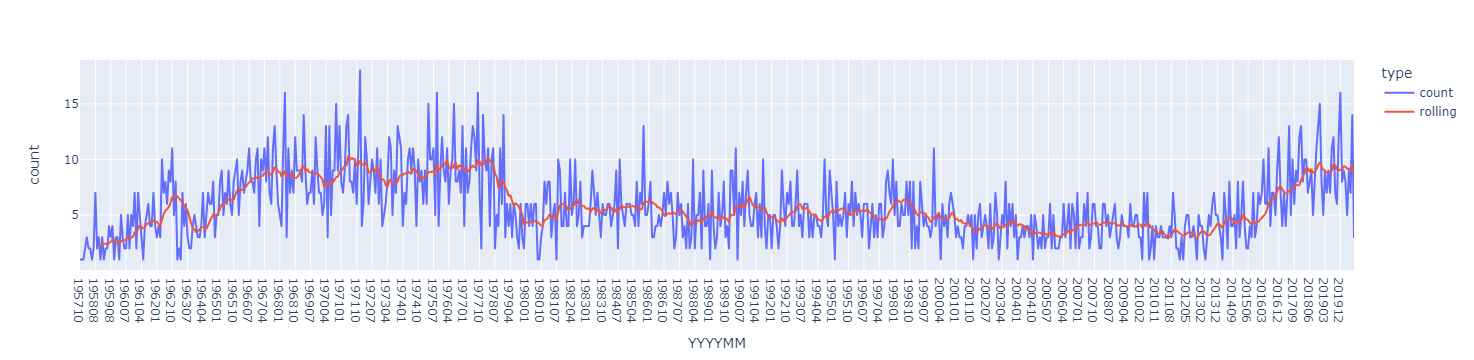

In [197]:
temp = df_data.copy()
temp['YYYYMM'] = pd.to_datetime(temp['Date'],utc=True).dt.strftime("%Y%m")
temp['count'] = 1
temp = temp[["YYYYMM","count"]].groupby('YYYYMM').sum().reset_index()
temp["type"] = "count"

df_rolling = temp.copy()
df_rolling["count"] = df_rolling["count"].rolling(12).mean()
df_rolling["type"] = "rolling"

display(df_rolling)

temp = pd.concat(
    [temp,df_rolling]
    )

display(HTML("<h3>Rolling and Count Line Chart</h3>"))

fig = px.line(
    temp, 
    x="YYYYMM", 
    y="count", 
    color='type'
    )
fig.show()


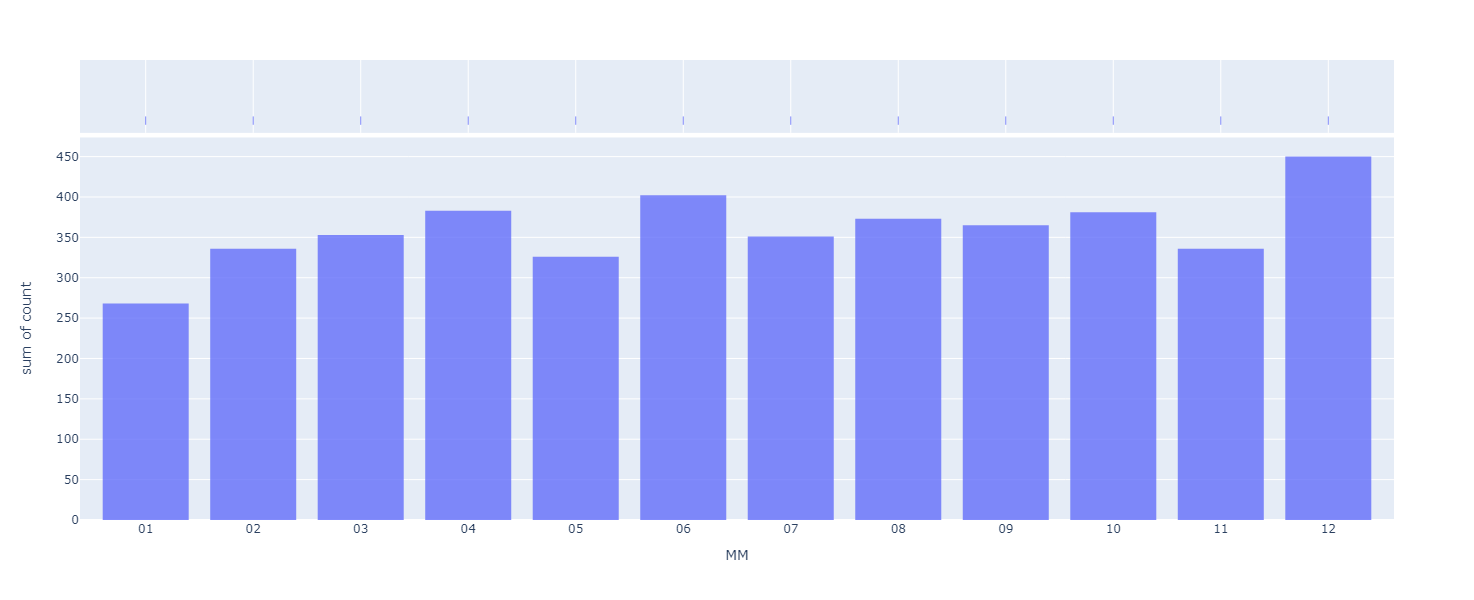

In [199]:
temp = df_data.copy()
temp['MM'] = pd.to_datetime(temp['Date'],utc=True).dt.strftime("%m")
temp['count'] = 1
temp = temp[["MM","count"]].groupby('MM').sum().reset_index()

fig = px.histogram(
    temp, 
    x='MM', 
    y = "count",
    # color='count',
    marginal="rug",
    hover_data=temp.columns,
    height=600
    )
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.80)
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
temp = df_data.copy()
temp['MM'] = pd.to_datetime(temp['Date'],utc=True).dt.strftime("%m")
temp['count'] = 1
temp = temp[["MM","count"]].groupby('MM').sum().reset_index()

fig = px.histogram(
    temp, 
    x='MM', 
    y = "count",
    # color='count',
    marginal="rug",
    hover_data=temp.columns,
    height=600
    )
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.80)
fig.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

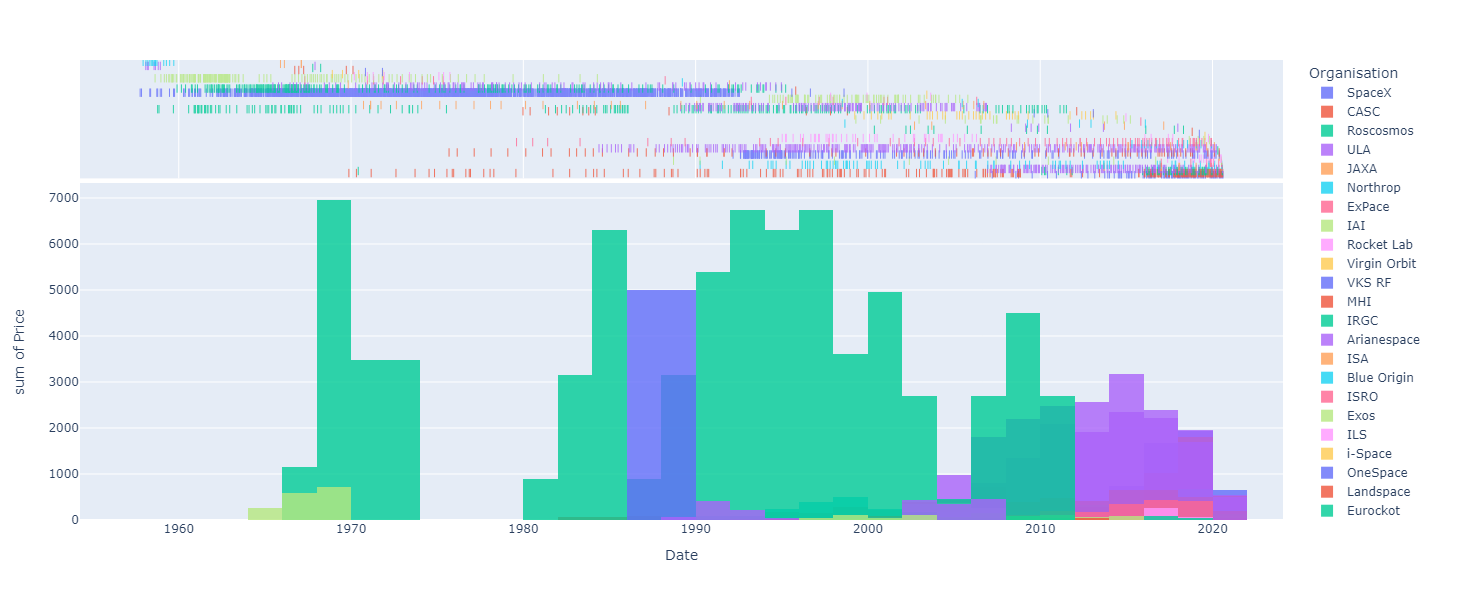

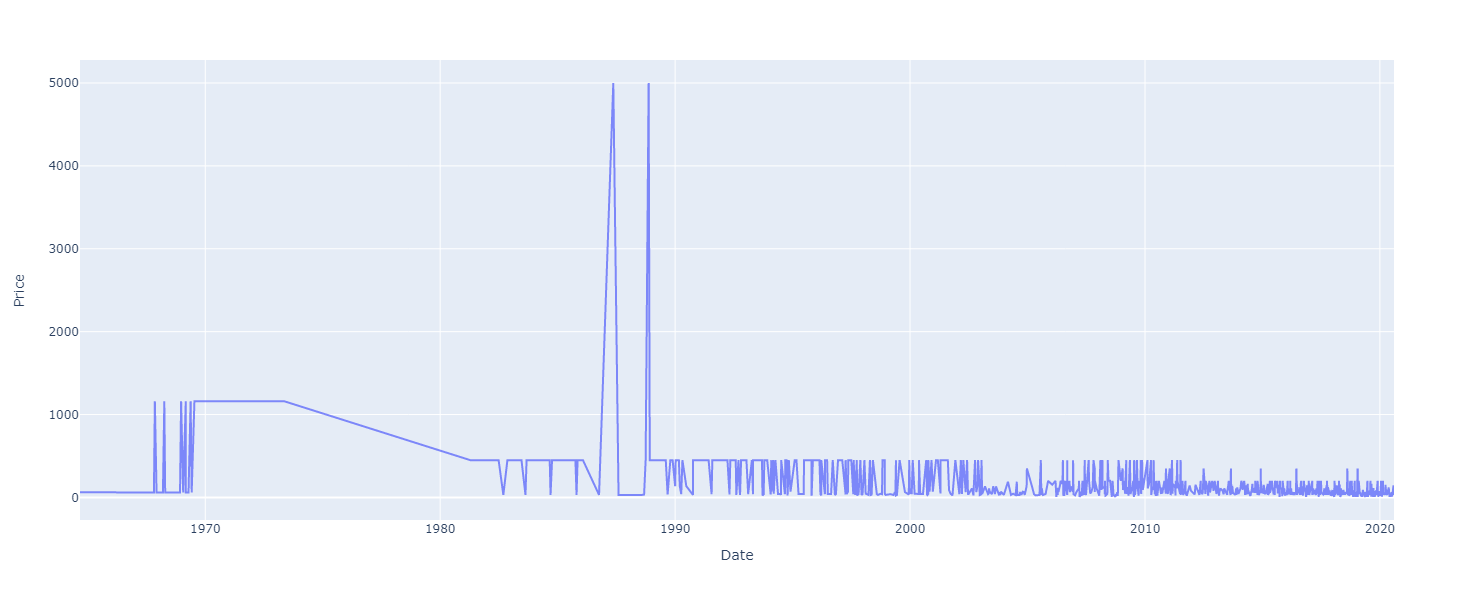

In [204]:

fig = px.histogram(
    df_data, 
    x='Date', 
    y = "Price",
    color='Organisation',
    marginal="rug",
    hover_data=df_data.columns,
    height=600
    )
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.80)
fig.show()


temp = df_data.copy().dropna()

fig = px.line(
    temp, 
    x='Date', 
    y = "Price",
    # color='Organisation',
    # marginal="rug",
    # hover_data=df_data.columns,
    height=600
    )
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.80)
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

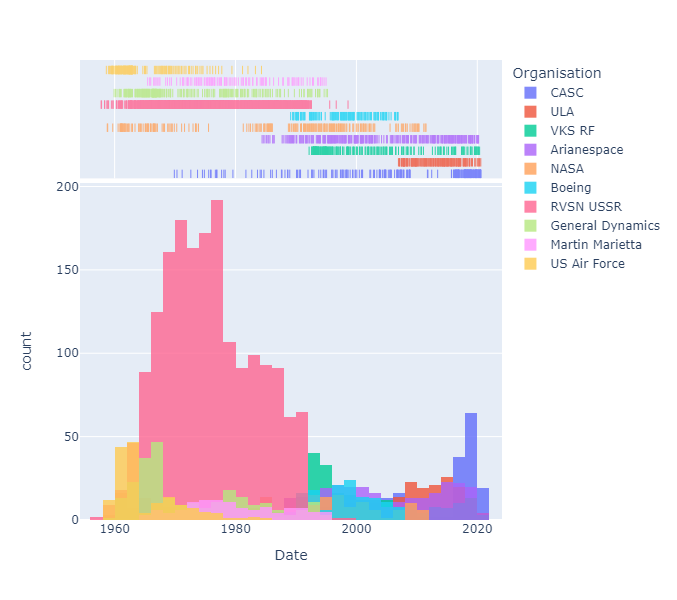

In [215]:
temp = df_data.copy()
temp["count"] = 1
temp = temp[["Organisation","count"]].groupby('Organisation').sum().reset_index()
temp = temp.sort_values(by="count",ascending=False).reset_index(drop=True)

top10 = list(temp["Organisation"].head(10))

# display(top10)

temp = df_data.copy()
temp = temp.loc[ temp["Organisation"].isin(top10) ,:]

fig = px.histogram(
    temp, 
    x='Date', 
    # x = "Price",
    color='Organisation',
    marginal="rug",
    hover_data=temp.columns,
    height=600
    )
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.80)
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

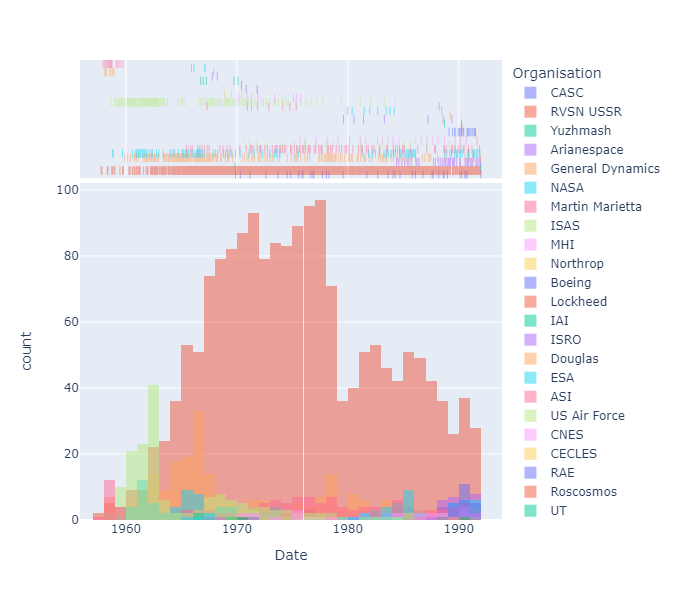

In [218]:
temp = df_data.copy()
temp['YYYYMMDD'] = pd.to_datetime(temp['Date'],utc=True).dt.strftime("%Y%m%d").astype(int)
temp = temp[temp['YYYYMMDD'] < 19920000]

fig = px.histogram(
    temp, 
    x='Date', 
    # x = "Price",
    color='Organisation',
    marginal="rug",
    hover_data=temp.columns,
    height=600
    )
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

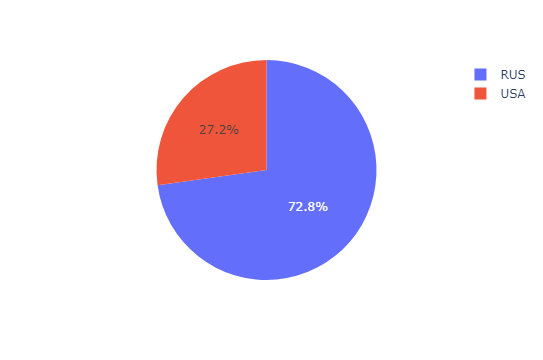

In [226]:
temp = df_data.copy()

temp['YYYYMMDD'] = pd.to_datetime(temp['Date'],utc=True).dt.strftime("%Y%m%d").astype(int)
temp = temp[temp['YYYYMMDD'] < 19920000]

temp["count"] = 1
temp.loc[ temp['Country'].str.contains('Kazakhstan') , 'A3'] = 'RUS'
temp = temp[["A3","Country","count"]].groupby(['A3',"Country"]).sum().reset_index()
# display(temp)

temp = temp[temp['A3'].isin(["USA","RUS"])]

fig = px.pie(
    temp, 
    values='count', 
    names='A3',
    height=300,
    )
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

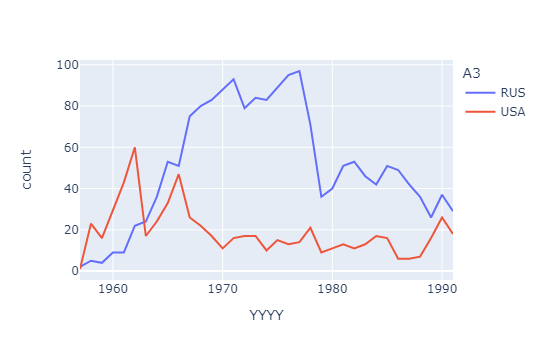

In [227]:
temp = df_data.copy()

temp['YYYYMMDD'] = pd.to_datetime(temp['Date'],utc=True).dt.strftime("%Y%m%d").astype(int)
temp = temp[temp['YYYYMMDD'] < 19920000]

temp['YYYY'] = pd.to_datetime(temp['Date'],utc=True).dt.strftime("%Y").astype(int)
temp["count"] = 1
temp.loc[ temp['Country'].str.contains('Kazakhstan') , 'A3'] = 'RUS'
temp = temp[["A3","YYYY","count"]].groupby(['A3',"YYYY"]).sum().reset_index()
temp = temp[temp['A3'].isin(["USA","RUS"])]

fig = px.line(
    temp, 
    x="YYYY", 
    y="count", 
    color='A3'
    )
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
#assuming we are still talking about the superPowers

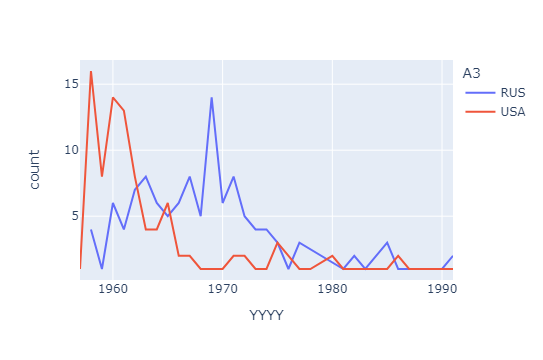

In [228]:
temp = df_data.copy()

temp['YYYYMMDD'] = pd.to_datetime(temp['Date'],utc=True).dt.strftime("%Y%m%d").astype(int)
temp = temp[temp['YYYYMMDD'] < 19920000]

temp['YYYY'] = pd.to_datetime(temp['Date'],utc=True).dt.strftime("%Y").astype(int)

temp = temp[temp['Mission_Status']  == "Failure"]

temp["count"] = 1
temp.loc[ temp['Country'].str.contains('Kazakhstan') , 'A3'] = 'RUS'
temp = temp[["A3","YYYY","count"]].groupby(['A3',"YYYY"]).sum().reset_index()
temp = temp[temp['A3'].isin(["USA","RUS"])]

fig = px.line(
    temp, 
    x="YYYY", 
    y="count", 
    color='A3'
    )
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

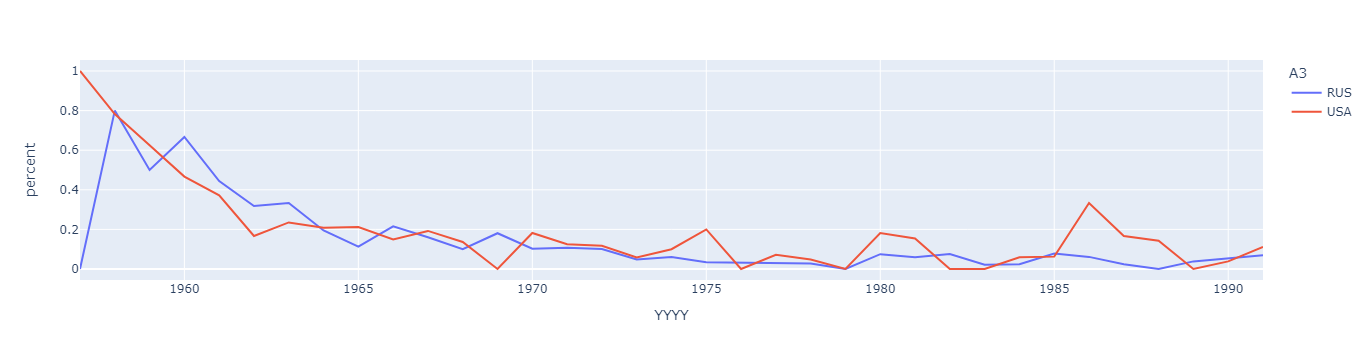

In [237]:
temp = df_data.copy()

temp.loc[ temp['Country'].str.contains('Kazakhstan') , 'A3'] = 'RUS'
temp = temp[temp['A3'].isin(["USA","RUS"])]

temp['YYYYMMDD'] = pd.to_datetime(temp['Date'],utc=True).dt.strftime("%Y%m%d").astype(int)
temp = temp[temp['YYYYMMDD'] < 19920000]

temp['YYYY'] = pd.to_datetime(temp['Date'],utc=True).dt.strftime("%Y").astype(int)

temp["Success_count"] = 0
temp["Failure_count"] = 0

temp.loc[ temp['Mission_Status'] == "Success" , 'Success_count'] = 1
temp.loc[ temp['Mission_Status']  == "Failure" , 'Failure_count'] = 1
temp.loc[ temp['Mission_Status']  == "Prelaunch Failure" , 'Failure_count'] = 1
temp.loc[ temp['Mission_Status']  == "Partial Failure" , 'Failure_count'] = 1


temp = temp[["A3","YYYY","Success_count","Failure_count"]].groupby(["A3","YYYY"]).sum().reset_index()

temp["percent"] = temp["Failure_count"]/(temp["Failure_count"] + temp["Success_count"])

# temp.head()

fig = px.line(
    temp, 
    x="YYYY", 
    y="percent", 
    color='A3'
    )
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

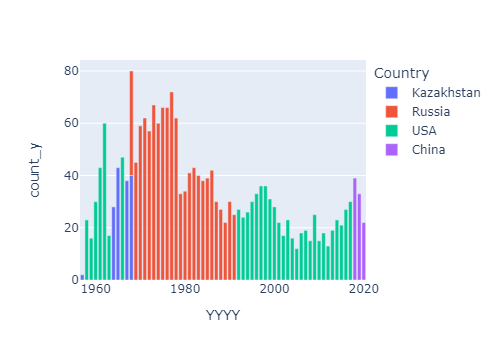

In [252]:
temp = df_data.copy()

temp.loc[ temp['Country'].str.contains('Kazakhstan') , 'A3'] = 'RUS'

temp['YYYY'] = pd.to_datetime(temp['Date'],utc=True).dt.strftime("%Y").astype(int)

temp["count"] = 1

temp = temp[["Country","YYYY","count"]].groupby(["Country","YYYY"]).sum().reset_index()
max_year = temp.groupby("YYYY").max("count").reset_index()

temp = pd.merge(temp,max_year, on="YYYY")

temp = temp[temp["count_x"] == temp["count_y"]]

# temp.head(100)

fig = px.bar(
    temp, 
    x='YYYY', 
    y = "count_y",
    color='Country',
    )
# fig.update_layout(barmode='overlay')
# fig.update_traces(opacity=0.80)
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

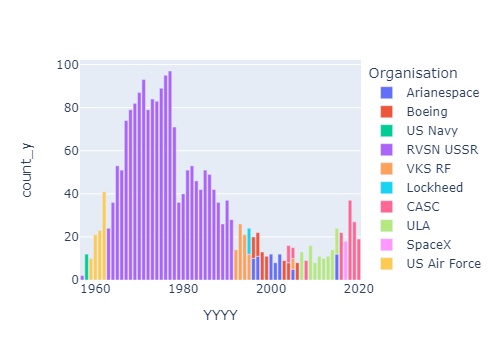

In [254]:
temp = df_data.copy()

temp['YYYY'] = pd.to_datetime(temp['Date'],utc=True).dt.strftime("%Y").astype(int)

temp["count"] = 1

temp = temp[["Organisation","YYYY","count"]].groupby(["Organisation","YYYY"]).sum().reset_index()
max_year = temp.groupby("YYYY").max("count").reset_index()

temp = pd.merge(temp,max_year, on="YYYY")

temp = temp[temp["count_x"] == temp["count_y"]]

# temp.head(100)

fig = px.bar(
    temp, 
    x='YYYY', 
    y = "count_y",
    color='Organisation',
    )
# fig.update_layout(barmode='overlay')
# fig.update_traces(opacity=0.80)
fig.show()